# Introduction to image processing

## Concepts

- What is an image and how is it formed?
- **What** is image processing and **why** do it?
- How do we represent images on the computer?
  - Floating point or integers
  - Grey or colour -- and moving from grey to colour [0.2125, 0.7154, 0.0721]
  - Other color spaces, e.g. for printing (CMYK) or perception (HSV)
  - Transparency

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division, print_function

In [2]:
image = np.zeros((100, 100)).astype(int)

image[30:60, 30:60] = 255
image[:10, :10] = 128

print(image)

[[128 128 128 ...,   0   0   0]
 [128 128 128 ...,   0   0   0]
 [128 128 128 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


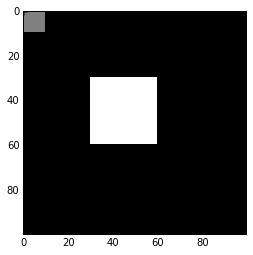

In [5]:
plt.imshow(image, cmap='gray', interpolation='nearest',
           vmin=0, vmax=255);

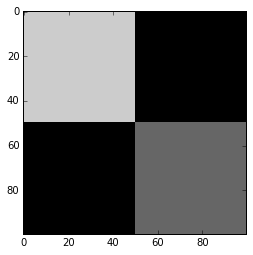

In [6]:
image = np.zeros((100, 100))
image[:50, :50] = 0.8
image[50:, 50:] = 0.4

plt.imshow(image, cmap='gray', interpolation='nearest',
           vmin=0, vmax=1);

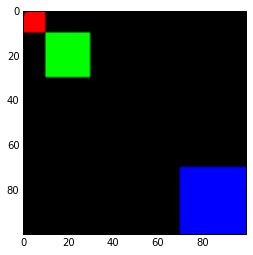

In [7]:
rgb = np.zeros((100, 100, 3))

rgb[:10, :10, 0] = 1
rgb[10:30, 10:30, 1] = 1
rgb[-30:, -30:, 2] = 1

plt.imshow(rgb, vmin=0, vmax=1);

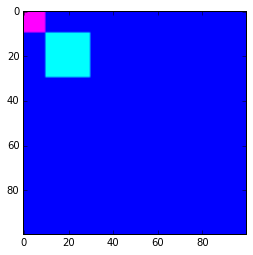

In [8]:
rgb = np.zeros((100, 100, 3))

rgb[:10, :10, 0] = 1
rgb[10:30, 10:30, 1] = 1
rgb[:, :, 2] = 1

plt.imshow(rgb, vmin=0, vmax=1);

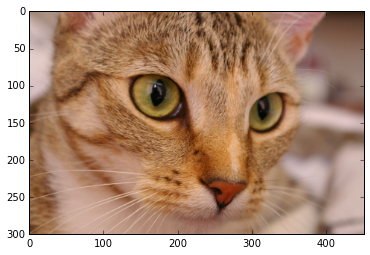

In [9]:
from skimage import data
cat = data.chelsea()

cat = cat.astype(float)
cat = cat / cat.max()

plt.imshow(cat);

In [10]:
cat.shape

(300, 451, 3)

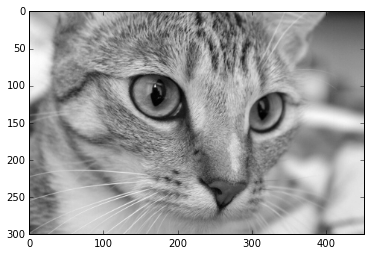

In [11]:
red = cat[..., 0]
green = cat[..., 1]
blue = cat[..., 2]

out = (red + green + blue) / 3.

plt.imshow(out, cmap='gray');

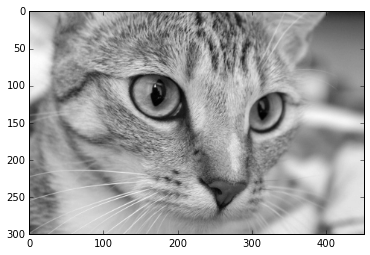

In [12]:
red = cat[..., 0]
green = cat[..., 1]
blue = cat[..., 2]

out = 0.2125 * red + 0.7154 * green + 0.0721 * blue

plt.imshow(out, cmap='gray');

In [14]:
def split_color(image):
    red = image[:, :, 0]
    green = image[..., 1]
    blue = image[..., 2]

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(10, 4))

    ax0.imshow(red, cmap='gray')
    ax0.set_xlabel('Red')

    ax1.imshow(green, cmap='gray')
    ax1.set_xlabel('Green')

    ax2.imshow(blue, cmap='gray')
    ax2.set_xlabel('Blue')

    ax3.imshow(image, vmin=0, vmax=1, cmap='gray')
    ax3.set_xlabel('RGB')

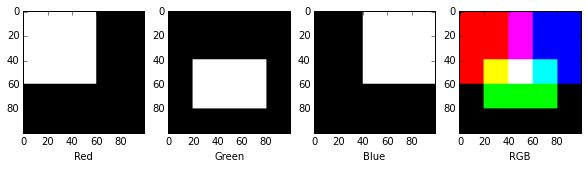

In [16]:
red = np.zeros((100, 100))
green = np.zeros((100, 100))
blue = np.zeros((100, 100))

red[:60, :60] = 1
blue[:60, -60:] = 1
green[40:80, 20:80] = 1

image = np.dstack((red, green, blue))

split_color(image)

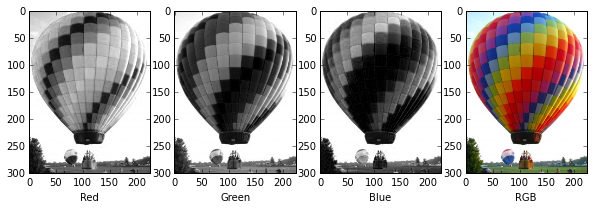

In [17]:
balloon = plt.imread('images/balloon.jpg')
split_color(balloon)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.html.widgets import interact

# Let's examine the content of an image

1. Load the image using plt.imread (or get an example image from skimage.data)

then examine it by

- Plotting it (color map, interpolation)
- Looking at its histogram (always [be careful of histogram bin width](http://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/))
- Taking a slice through it

## Modifying an image

- Adjusting its values element-wise
- Thresholding an image
- Filtering an image (blurring, mean and median filters)

In [20]:
ls images/*

images/balloon.jpg       images/coffee.png       images/moonlanding.jpg
images/camera.png        images/forest.jpg       images/noisypeppers.png
images/chapel_floor.png  images/greenscreen.jpg  images/stefan.jpg
images/clock_motion.png  images/mona_lisa.jpg


In [21]:
image = plt.imread('images/balloon.jpg')
image = image.astype(float)
image = image / 255.

In [22]:
from skimage import img_as_float

image = img_as_float(plt.imread('images/balloon.jpg'))

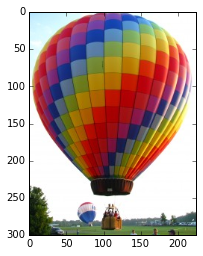

In [24]:
plt.imshow(image, vmin=0, vmax=1);

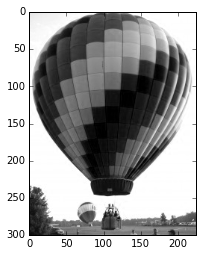

In [26]:
green = image[..., 1]
plt.imshow(green, cmap='gray');

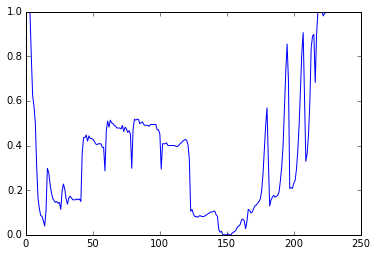

In [28]:
line = green[100, :]

plt.plot(line);

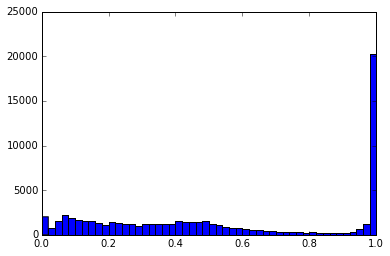

In [154]:
plt.hist(green.ravel(), bins=50);

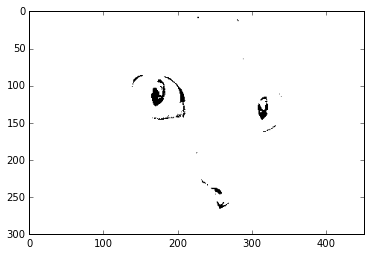

In [30]:
from skimage import color
grey_cat = color.rgb2gray(cat)

plt.imshow(grey_cat > 0.1, cmap='gray');

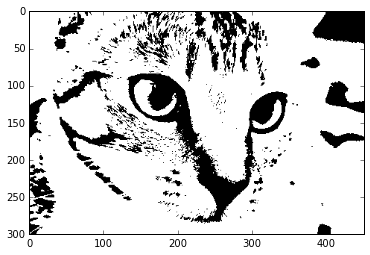

In [40]:
@interact(value=(0, 1, 0.1))
def threshold(value=0.5):
    plt.imshow(grey_cat > value, cmap='gray', vmin=0, vmax=1)

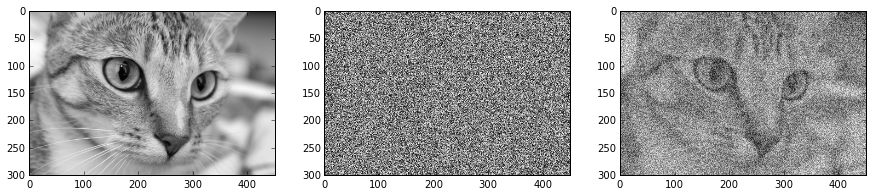

In [37]:
noise = np.random.random(grey_cat.shape)

noisy_cat = grey_cat + noise

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 10))
ax0.imshow(grey_cat, cmap='gray')
ax1.imshow(noise, cmap='gray')
ax2.imshow(noisy_cat, cmap='gray');

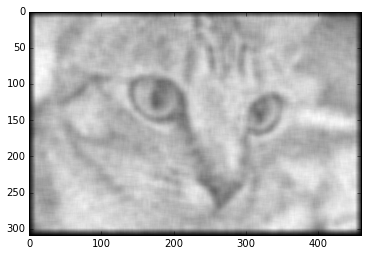

In [39]:
from scipy.signal import convolve

out = convolve(noisy_cat, np.ones((10, 10))/3.)

plt.imshow(out, cmap='gray');

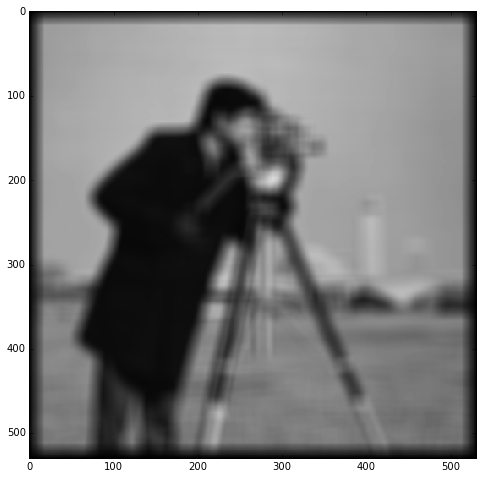

In [59]:
from skimage import data, color
from scipy.signal import convolve

image = img_as_float(data.camera())

@interact(n=(1,20,2))
def blur(n=5):
    out = convolve(image, np.ones([n, n]) / (n * n))
    
    f, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(out, cmap='gray', interpolation='nearest', vmin=0, vmax=1)

# Exercises

1. Read in 'coffee.png' and make the image appear more red
   (hint: multiplication + np.clip)
2. Separate the actors from the green background in the image ``images/greenscreen.jpg`` by
   thresholding the different colour channels in a suitable way. Then place the
   actors on top of some other (more interesting) background of your own choosing
   (e.g. ``images/forest.jpg``).
3. Implement a mean or a median filter, and apply it to ``images/noisypeppers.png``.


Advanced:

4. The image 'moonlanding.jpg' has been subjected to some bad periodic noise.  Apply the
   Fast Fourier Transform (FFT) to the image and see if there are any peaks.  Suppress the high
   frequency components of the transform and then apply the inverse FFT.  [See the template solution below,
   or the [full solution notebook](moonlanding_solution.ipynb)]

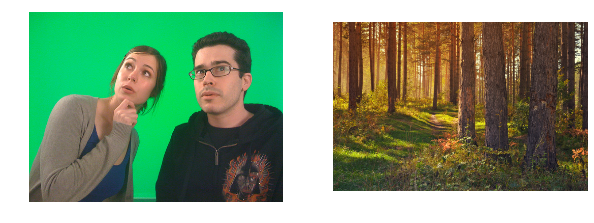

In [70]:
greenscreen = plt.imread('images/greenscreen.jpg')
forest = plt.imread('images/forest.jpg')

f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

ax0.imshow(greenscreen)
ax0.axis('off')

ax1.imshow(forest)
ax1.axis('off');

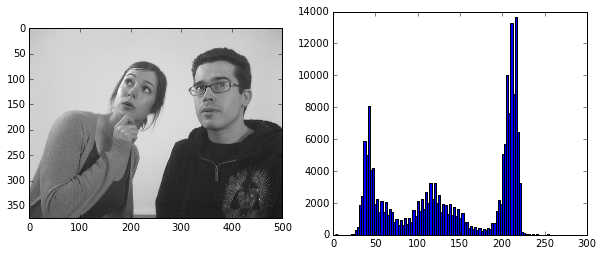

In [155]:
people = plt.imread('images/greenscreen.jpg')[..., 1]

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.imshow(people, cmap='gray')
ax1.hist(people.ravel(), bins=100);

In [ ]:
## Template for question 4

"""
An image contaminated by periodic systems noise is filtered by supressing
appropriate frequencies in its spectrum.

Note that most computational packages return the 2-dimensional FFT with the
lowest frequencies on the outside (four corners), and the highest frequencies
in the center.  The ``np.fft.fftshift`` command is used to move the low
frequency components to the center.
"""


import numpy as np
from matplotlib import pyplot as plt


def plot_spectrum(F, axis):
    """Compress and plot an amplitude spectrum.

    The values in the spectrum vary widely in amplitude, so a log transform is
    applied to compress its range.

    """
    # Compute the spectrum magnitude
    mag = np.abs(F)

    # Compress range
    mag = np.log(1 + mag)

    # Display
    axis.imshow(np.fft.fftshift(mag), plt.cm.Blues)


image = plt.imread('images/moonlanding.jpg')

# Compute the 2-D FFT of the input image
F = ...

# Make a copy of the original spectrum to operate on
FF = F.copy()

# Set a part of the spectrum to zero
FF[ ... ] = 0
FF[ ... ] = 0

# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
image_filtered = np.fft.ifft2(FF).real


# Show the results
f, ax = plt.subplots(2, 2, figsize=(8, 7))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original image')

plot_spectrum(F, ax[0, 1])
ax[0, 1].set_title('Fourier transform')

ax[1, 0].imshow(image_filtered, plt.cm.gray)
ax[1, 0].set_title('Reconstructed Image')

plot_spectrum(FF, ax[1, 1])
ax[1, 1].set_title('Filtered Spectrum')

plt.show()

# Challenge 1: image rotation

The following code shows how to rotate an image using the skimage (scikit-image) library.

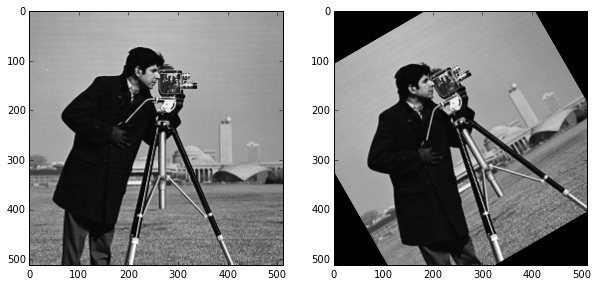

In [72]:
import matplotlib.pyplot as plt
from skimage import transform, data

camera = plt.imread('images/camera.png')
rotated = transform.rotate(camera, 30)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(camera, cmap='gray')
ax1.imshow(rotated, cmap='gray');

<span style="font-size: 150%;">**Assignment**: Implement your own algorithm that does
the same as the code above (i.e., take an input image, and rotate it).</span>

If you feel creative, you can also write code to magnify (zoom) the image.

<p></p>

---

In [75]:
A = np.array([[4, 2], [1, 6]])
print(A)

[[4 2]
 [1 6]]


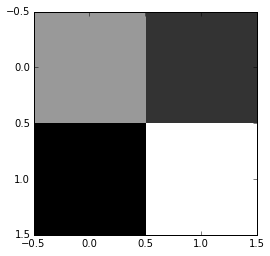

In [76]:
plt.imshow(A, cmap='gray', interpolation='nearest');

See http://en.wikipedia.org/wiki/Polar_coordinate_system

## For later discussion: interpolation

### Bi-linear interpolation

<img src="material/Bilinear_interpolation.png" style="float: left;"/>
<div style="clear: both;"/>

Also see [bilinear interpolation on Wikipedia](http://en.wikipedia.org/wiki/Bilinear_interpolation)

# Some warping experiments!

## Fish-eye

In [142]:
from skimage import transform, io
import numpy as np
import matplotlib.pyplot as plt

face = io.imread('images/mona_lisa.jpg')

In [143]:
# Define a transformation on the x-y coordinates

def fisheye(xy):
    center = np.mean(xy, axis=0)
    xc, yc = (xy - center).T

    # Polar coordinates
    r = np.sqrt(xc**2 + yc**2)
    theta = np.arctan2(yc, xc)

    r = 1.2 * np.exp(r**(1/1.8) / 3.)

    return np.column_stack((r * np.cos(theta), r * np.sin(theta))) + center

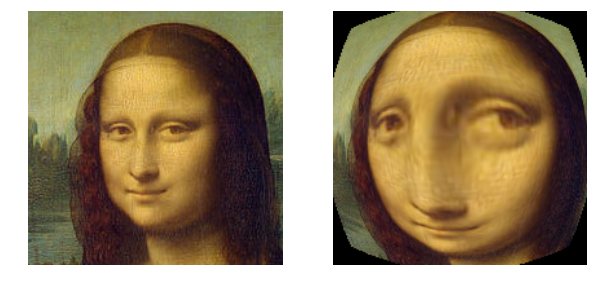

In [145]:
# Warp and display

out = transform.warp(face, fisheye)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(face)
ax0.set_axis_off()

ax1.imshow(out)
ax1.set_axis_off()

plt.show()

## Run the following scripts for fun:

(Open up the terminal in the "scripts" directory first)

- **deswirl.py** (run using: ``python deswirl.py``)

    In the UK, a criminal tried to hide his identity by posting
    swirled pictures of his face online.  Here, we use the
    Mona Lisa to illustrate what he did.  Can you restore
    her face back to normal? (Note that you can adjust the
    position of the red dot, as well as move the sliders.)
    
    
- **clock_deblur.py**

    I took a picture of a wall clock while moving my camera.  Now, I cannot
    read the time in the resulting picture!  I've implemented a deblurring
    algorithm, though, so perhaps you can adjust the parameters to help me find
    the time?

# Here's the code for the swirl transform:

In [146]:
from skimage import transform

def swirl(xy, center=[0, 0], strength=1, radius=100, rotation=0):
    """Compute the coordinate mapping for a swirl transformation.

    """
    x, y = xy.T
    x0, y0 = center
    rho = np.sqrt((x - x0)**2 + (y - y0)**2)

    # Ensure that the transformation decays to approximately 1/1000-th
    # within the specified radius.
    radius = radius / 5 * np.log(2)

    theta = rotation + strength * \
            np.exp(-rho / radius) + \
            np.arctan2(y - y0, x - x0)

    xy[..., 0] = x0 + rho * np.cos(theta)
    xy[..., 1] = y0 + rho * np.sin(theta)

    return xy


image = plt.imread('images/stefan.jpg')
h, w = image.shape[:2]

parameters = {'center': [w/2., h/2.],
              'strength': 10,
              'radius': 90,
              'rotation':  0}

out = transform.warp(image, swirl, parameters)

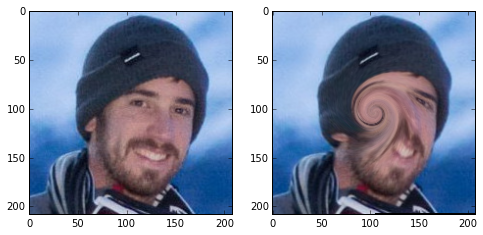

In [148]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

ax0.imshow(image)
ax1.imshow(out);

# Can you come up with an even better distortion?

## Start with this template:

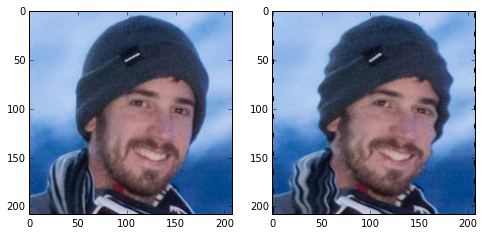

In [150]:
def my_warp(xy):
    x = xy[:, 0]
    y = xy[:, 1]
    
    x = x + 1.5 * np.sin(y / 3)
    
    return np.hstack((x, y))

image = plt.imread('images/stefan.jpg')
out = transform.warp(image, my_warp)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
ax0.imshow(image)
ax1.imshow(out);

# For more fun examples see http://scikit-image.org/docs/dev/auto_examples